# Verzeo Major Project-Predicting total cases of COVID-19 in INDIA 

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Importing the dataset

In [50]:
df=pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35292,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35293,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35294,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35295,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Slicing out the data for India

In [51]:
df=df[df['location']=='India']
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15127,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15128,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15129,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15130,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15131,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,IND,Asia,India,2020-08-03,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15343,IND,Asia,India,2020-08-04,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15344,IND,Asia,India,2020-08-05,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15345,IND,Asia,India,2020-08-06,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


## Dropping the columns with constant value in all the rows

In [52]:
df.iloc[:,22:37]

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15127,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15128,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15129,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15130,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15131,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15343,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15344,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15345,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [53]:
df.drop(df.columns[22:37],axis=1,inplace=True)
df

C:\Users\jainm\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index
15127,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15129,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15130,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15131,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,IND,Asia,India,2020-08-03,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,...,381027.0,20202858.0,14.640,0.276,485151.0,0.352,9.222,0.108,samples tested,79.63
15343,IND,Asia,India,2020-08-04,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,...,661892.0,20864750.0,15.119,0.480,504266.0,0.365,9.474,0.106,samples tested,79.63
15344,IND,Asia,India,2020-08-05,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,...,619652.0,21484402.0,15.568,0.449,534380.0,0.387,9.933,0.101,samples tested,79.63
15345,IND,Asia,India,2020-08-06,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,...,664949.0,22149351.0,16.050,0.482,565567.0,0.410,10.398,0.096,samples tested,79.63


In [54]:
df.drop('tests_units',axis=1,inplace=True)
df

C:\Users\jainm\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
15127,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15129,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15130,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15131,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,IND,Asia,India,2020-08-03,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,...,0.559,381027.0,20202858.0,14.640,0.276,485151.0,0.352,9.222,0.108,79.63
15343,IND,Asia,India,2020-08-04,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,...,0.582,661892.0,20864750.0,15.119,0.480,504266.0,0.365,9.474,0.106,79.63
15344,IND,Asia,India,2020-08-05,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,...,0.621,619652.0,21484402.0,15.568,0.449,534380.0,0.387,9.933,0.101,79.63
15345,IND,Asia,India,2020-08-06,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,...,0.655,664949.0,22149351.0,16.050,0.482,565567.0,0.410,10.398,0.096,79.63


In [55]:
df.drop(['iso_code','continent','location'],axis=1,inplace=True)
df

C:\Users\jainm\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
15127,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15129,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15130,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15131,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,2020-08-03,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,27.634,0.559,381027.0,20202858.0,14.640,0.276,485151.0,0.352,9.222,0.108,79.63
15343,2020-08-04,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,28.216,0.582,661892.0,20864750.0,15.119,0.480,504266.0,0.365,9.474,0.106,79.63
15344,2020-08-05,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,28.837,0.621,619652.0,21484402.0,15.568,0.449,534380.0,0.387,9.933,0.101,79.63
15345,2020-08-06,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,29.492,0.655,664949.0,22149351.0,16.050,0.482,565567.0,0.410,10.398,0.096,79.63


## Checking the % of null values in each column

In [56]:
(df.isnull().sum()/220)*100

date                                0.000000
total_cases                         0.000000
new_cases                           0.000000
total_deaths                        0.000000
new_deaths                          0.000000
total_cases_per_million             0.000000
new_cases_per_million               0.000000
total_deaths_per_million            0.000000
new_deaths_per_million              0.000000
new_tests                          40.909091
total_tests                        38.181818
total_tests_per_thousand           38.181818
new_tests_per_thousand             40.909091
new_tests_smoothed                 35.909091
new_tests_smoothed_per_thousand    35.909091
tests_per_case                     35.909091
positive_rate                      35.909091
stringency_index                    0.454545
dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 15127 to 15346
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             220 non-null    object 
 1   total_cases                      220 non-null    float64
 2   new_cases                        220 non-null    float64
 3   total_deaths                     220 non-null    float64
 4   new_deaths                       220 non-null    float64
 5   total_cases_per_million          220 non-null    float64
 6   new_cases_per_million            220 non-null    float64
 7   total_deaths_per_million         220 non-null    float64
 8   new_deaths_per_million           220 non-null    float64
 9   new_tests                        130 non-null    float64
 10  total_tests                      136 non-null    float64
 11  total_tests_per_thousand         136 non-null    float64
 12  new_tests_per_th

## Converting date to ordinal

In [58]:
import datetime as dt
df['date']=pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)
df

C:\Users\jainm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jainm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
15127,737424,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,737425,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15129,737426,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15130,737427,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
15131,737428,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,737640,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,27.634,0.559,381027.0,20202858.0,14.640,0.276,485151.0,0.352,9.222,0.108,79.63
15343,737641,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,28.216,0.582,661892.0,20864750.0,15.119,0.480,504266.0,0.365,9.474,0.106,79.63
15344,737642,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,28.837,0.621,619652.0,21484402.0,15.568,0.449,534380.0,0.387,9.933,0.101,79.63
15345,737643,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,29.492,0.655,664949.0,22149351.0,16.050,0.482,565567.0,0.410,10.398,0.096,79.63


In [63]:
df=df.reset_index()

In [64]:
df.drop('index',axis=1,inplace=True)
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
0,737424,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,737425,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,737426,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,737427,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,737428,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,737640,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,27.634,0.559,381027.0,20202858.0,14.640,0.276,485151.0,0.352,9.222,0.108,79.63
216,737641,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,28.216,0.582,661892.0,20864750.0,15.119,0.480,504266.0,0.365,9.474,0.106,79.63
217,737642,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,28.837,0.621,619652.0,21484402.0,15.568,0.449,534380.0,0.387,9.933,0.101,79.63
218,737643,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,29.492,0.655,664949.0,22149351.0,16.050,0.482,565567.0,0.410,10.398,0.096,79.63


In [77]:
df.loc[0:25,:]

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
0,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
5,737429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,737430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7,737431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
8,737432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
9,737433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


## Dropping the first 30 rows with every value as 0 or NaN(Dataset will become meaningless if replaced by mean values)

In [72]:
df['total_cases'].values[0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [80]:
df2=df.drop(list(range(0,30)),axis=0)

In [84]:
df2.isnull().sum()

date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
new_tests                          60
total_tests                        54
total_tests_per_thousand           54
new_tests_per_thousand             60
new_tests_smoothed                 49
new_tests_smoothed_per_thousand    49
tests_per_case                     49
positive_rate                      49
stringency_index                    0
dtype: int64

In [85]:
df2

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index
30,737454,1.0,1.0,0.0,0.0,0.001,0.001,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19
31,737455,1.0,0.0,0.0,0.0,0.001,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19
32,737456,1.0,0.0,0.0,0.0,0.001,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19
33,737457,2.0,1.0,0.0,0.0,0.001,0.001,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19
34,737458,2.0,0.0,0.0,0.0,0.001,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,737640,1803695.0,52972.0,38135.0,771.0,1307.021,38.385,27.634,0.559,381027.0,20202858.0,14.640,0.276,485151.0,0.352,9.222,0.108,79.63
216,737641,1855745.0,52050.0,38938.0,803.0,1344.738,37.717,28.216,0.582,661892.0,20864750.0,15.119,0.480,504266.0,0.365,9.474,0.106,79.63
217,737642,1908254.0,52509.0,39795.0,857.0,1382.788,38.050,28.837,0.621,619652.0,21484402.0,15.568,0.449,534380.0,0.387,9.933,0.101,79.63
218,737643,1964536.0,56282.0,40699.0,904.0,1423.572,40.784,29.492,0.655,664949.0,22149351.0,16.050,0.482,565567.0,0.410,10.398,0.096,79.63


## Replacing the NaN values by mean values.

In [161]:
df2.fillna(df2.mean(),inplace=True)

## Plotting a histogram for each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B461F6F08>,
      dtype=object)

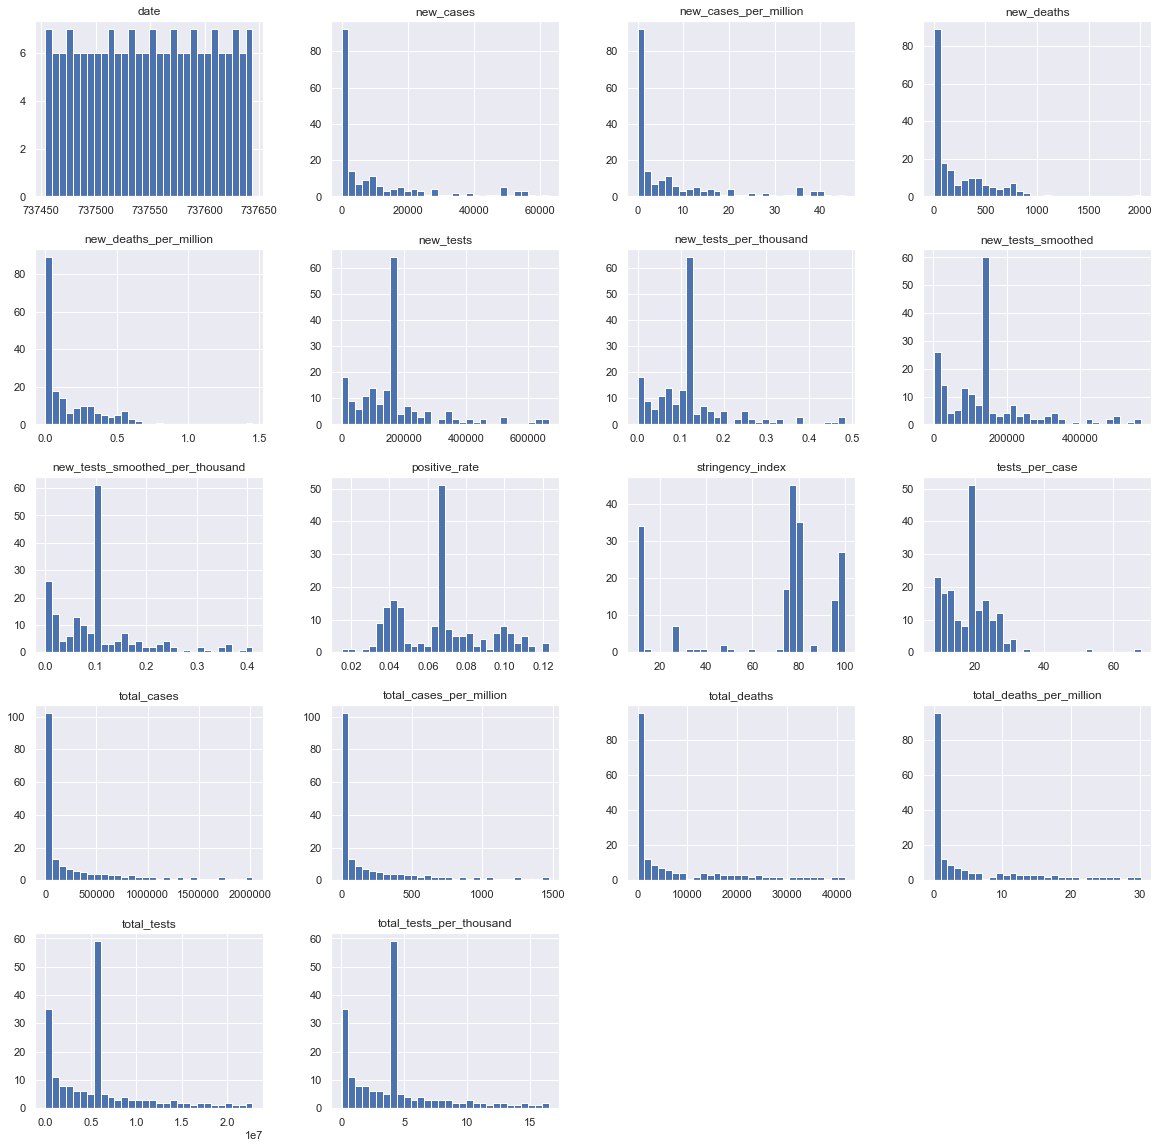

In [162]:
df2.hist(figsize=(20,20),bins=30)

## Displaying mean,median and mode of each column

In [163]:
df2.mean()

date                               7.375493e+05
total_cases                        3.086987e+05
new_cases                          1.066881e+04
total_deaths                       7.838232e+03
new_deaths                         2.188684e+02
total_cases_per_million            2.236939e+02
new_cases_per_million              7.730989e+00
total_deaths_per_million           5.679863e+00
new_deaths_per_million             1.585895e-01
new_tests                          1.742577e+05
total_tests                        5.955752e+06
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 1.485289e+05
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   6.690632e+01
dtype: float64

In [164]:
df2.median()

date                               7.375495e+05
total_cases                        4.448300e+04
new_cases                          2.801000e+03
total_deaths                       1.470500e+03
new_deaths                         8.500000e+01
total_cases_per_million            3.223400e+01
new_cases_per_million              2.029500e+00
total_deaths_per_million           1.065500e+00
new_deaths_per_million             6.150000e-02
new_tests                          1.742577e+05
total_tests                        5.955752e+06
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 1.485289e+05
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   7.778000e+01
dtype: float64

In [167]:
df2.mode(axis=0).iloc[0,:]

date                               7.374540e+05
total_cases                        3.000000e+00
new_cases                          0.000000e+00
total_deaths                       0.000000e+00
new_deaths                         0.000000e+00
total_cases_per_million            2.000000e-03
new_cases_per_million              0.000000e+00
total_deaths_per_million           0.000000e+00
new_deaths_per_million             0.000000e+00
new_tests                          1.742577e+05
total_tests                        5.955752e+06
total_tests_per_thousand           4.315772e+00
new_tests_per_thousand             1.262923e-01
new_tests_smoothed                 1.485289e+05
new_tests_smoothed_per_thousand    1.076241e-01
tests_per_case                     1.819218e+01
positive_rate                      6.600709e-02
stringency_index                   1.019000e+01
Name: 0, dtype: float64

## Declaring X and y for modelling

In [209]:
X=df2.drop('total_cases',axis=1)
y=df2[['total_cases']]
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(190, 17)
(190, 1)


## Plotting scatter plot for each column with total cases

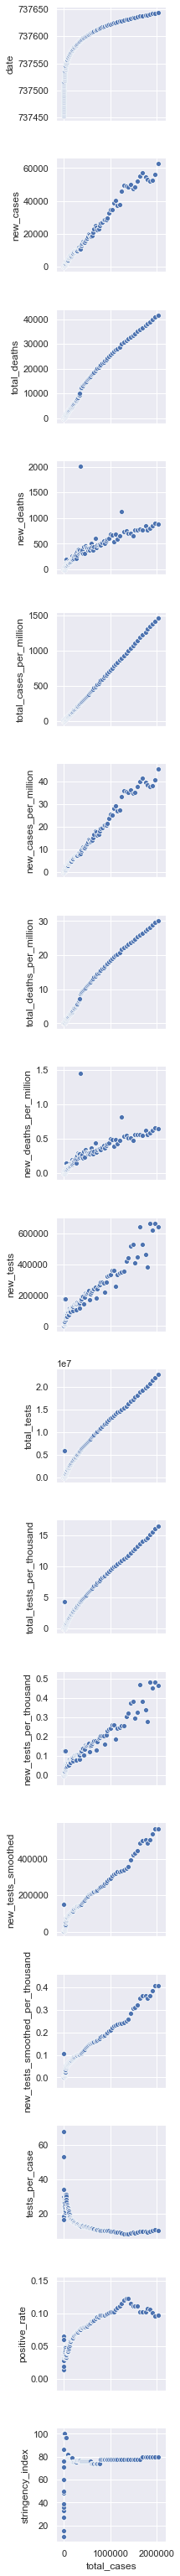

In [169]:
pp = sns.pairplot(data=df2,
                  x_vars=['total_cases'],
                  y_vars=X.columns)

## Plotting line plot for each column with total cases

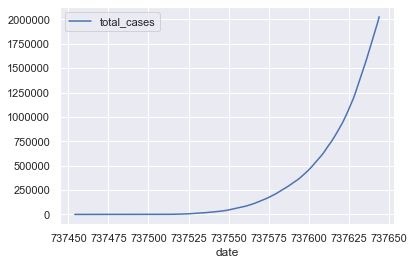

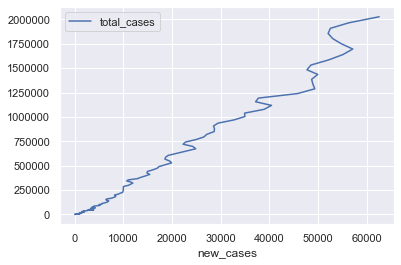

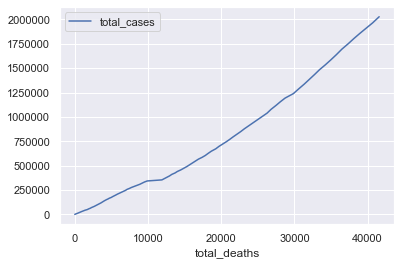

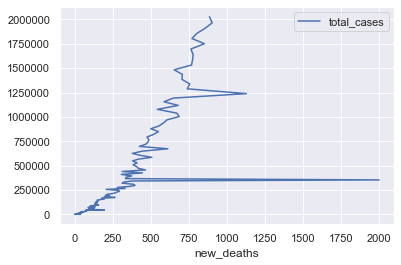

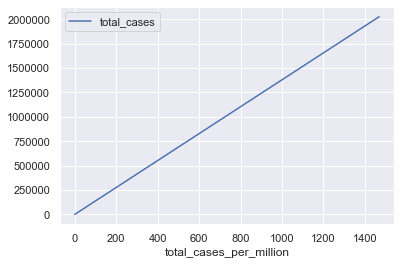

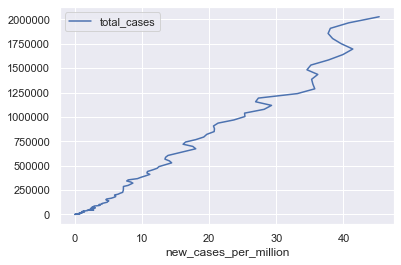

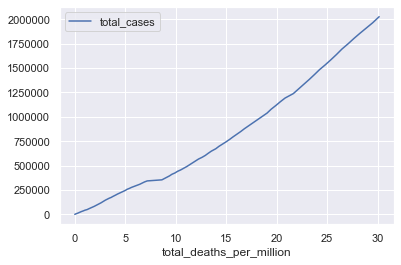

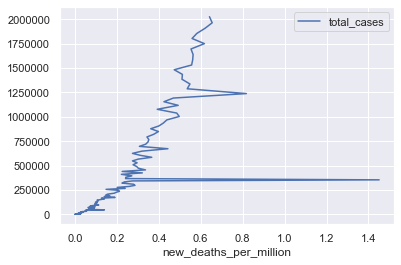

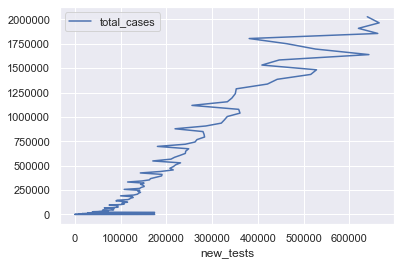

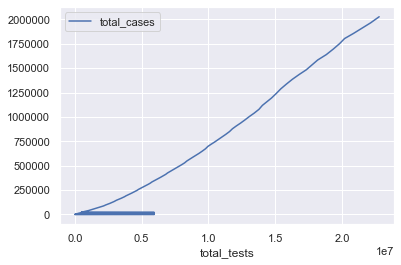

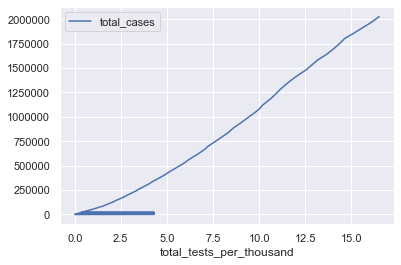

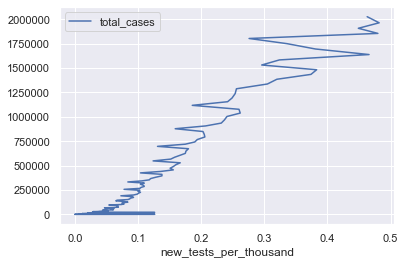

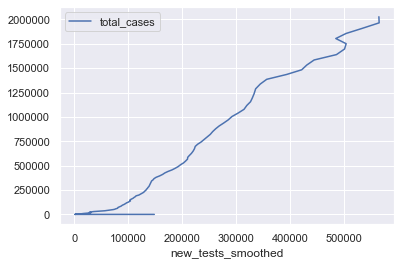

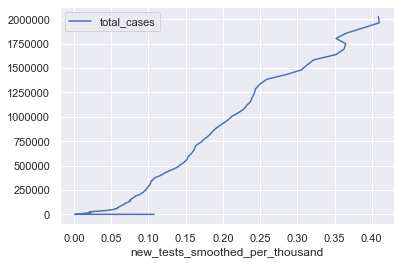

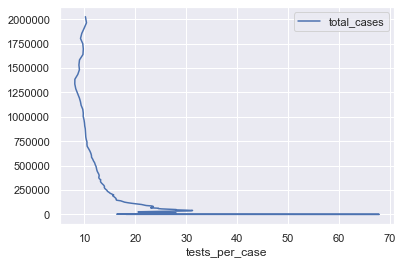

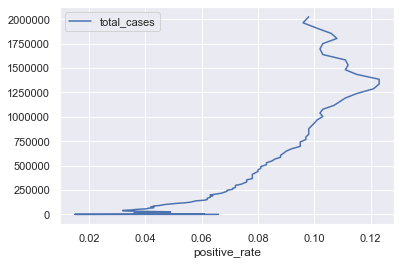

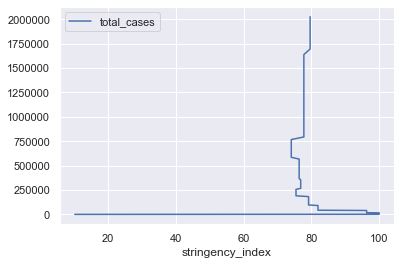

In [171]:
for col in X.columns:
    df2.plot(col,'total_cases')

## Plotting the correlation matrix in order to drop highly correlated features as only one of them can represent the others too

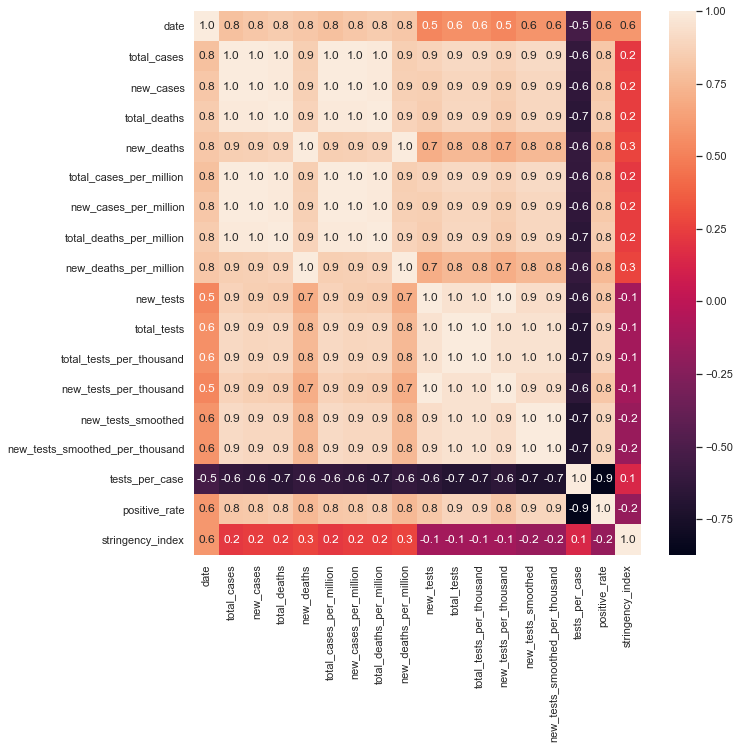

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,fmt='0.1f')
plt.show()

In [210]:
drop_list=['total_cases_per_million','new_cases_per_million','total_deaths','total_tests','total_deaths_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand']
drop_list

['total_cases_per_million',
 'new_cases_per_million',
 'total_deaths',
 'total_tests',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand']

In [211]:
X.drop(drop_list,axis=1,inplace=True)
X

,date,new_cases,new_deaths,new_tests,tests_per_case,positive_rate,stringency_index
30,737454,1.0,0.0,174257.730769,18.192177,0.066007,10.19
31,737455,0.0,0.0,174257.730769,18.192177,0.066007,10.19
32,737456,0.0,0.0,174257.730769,18.192177,0.066007,10.19
33,737457,1.0,0.0,174257.730769,18.192177,0.066007,10.19
34,737458,0.0,0.0,174257.730769,18.192177,0.066007,10.19
...,...,...,...,...,...,...,...
215,737640,52972.0,771.0,381027.000000,9.222000,0.108000,79.63
216,737641,52050.0,803.0,661892.000000,9.474000,0.106000,79.63
217,737642,52509.0,857.0,619652.000000,9.933000,0.101000,79.63
218,737643,56282.0,904.0,664949.000000,10.398000,0.096000,79.63


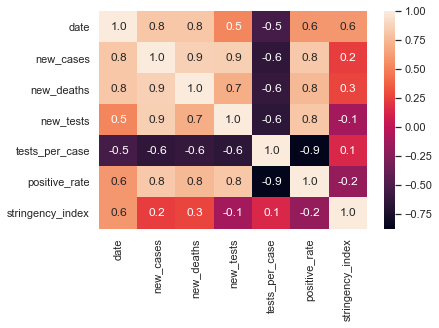

In [212]:
sns.heatmap(X.corr(),annot=True,fmt='0.1f')

## Standardizing X

In [213]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.72852006e+00, -6.78142713e-01, -7.54213166e-01, ...,
         9.65630702e-16,  1.79602270e-15, -1.83365209e+00],
       [-1.71038138e+00, -6.78206282e-01, -7.54213166e-01, ...,
         9.65630702e-16,  1.79602270e-15, -1.83365209e+00],
       [-1.69224271e+00, -6.78206282e-01, -7.54213166e-01, ...,
         9.65630702e-16,  1.79602270e-15, -1.83365209e+00],
       ...,
       [ 1.68155044e+00,  2.65974162e+00,  2.19897981e+00, ...,
        -1.12242583e+00,  1.50955992e+00,  4.11359763e-01],
       [ 1.69968911e+00,  2.89958769e+00,  2.36094022e+00, ...,
        -1.05923212e+00,  1.29386480e+00,  4.11359763e-01],
       [ 1.71782779e+00,  3.29727574e+00,  2.29891283e+00, ...,
        -1.08763531e+00,  1.38014285e+00,  4.11359763e-01]])

## Splitting into train and test data

In [214]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=69)

## Training the linear regression model and checking the accuracy

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
linreg=LinearRegression()
linreg.fit(x_train,y_train)
linreg.score(x_test,y_test)

0.9909981400030498

## Checking the OLS summary table to chekc the Adj-r2 (Sometimes r2 score is misleading)

In [216]:
import statsmodels.api as sm
x1=sm.add_constant(x_train)
results=sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1854.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):          2.90e-118
Time:                        15:23:26   Log-Likelihood:                -1547.9
No. Observations:                 127   AIC:                             3112.
Df Residuals:                     119   BIC:                             3135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.075e+05   4379.179     70.213      0.000    2.99e+05    3.16e+05
x1         -6958.6341   1.42e+04     -0.489      0.626   -3.52e+04    2.12e+04
x2          4.441e+05   2.23e+04     19.938      0.000       4e+05    4.88e+05
x3          1.255e+04   8086.366      1.552      0.123   -3462.678    2.86e+04
x4          5.881e+04   1.35e+04      4.361      0.000    3.21e+04    8.55e+04
x5          2495.9544   9620.490      0.259      0.796   -1.66e+04    2.15e+04
x6         -2.017e+04   1.97e+04     -1.024      0.308   -5.92e+04    1.88e+04
x7          3693.9964   1.22e+04      0.304      0.762   -2.04e+04    2.78e+04
==============================================================================
Omnibus:                       31.083   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.432
Skew:                           0.653   Prob(JB):                     4.82e-34
Kurtosis:                       8.224   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Training the RandomForest Regressor and checking the accuracy

In [217]:
rfor=RandomForestRegressor()
rfor.fit(x_train,y_train)
rfor.score(x_test,y_test)

C:\Users\jainm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9936018879969921

## Importing a custom data set thefist 10 days of October

In [223]:
dates=pd.read_csv('dates.csv')
dates

,date,new_cases,new_deaths,new_tests,tests_per_case,positive_rate,stringency_index
0,2020-09-01,52050.0,803.0,661892.0,9.474,0.108,79.63
1,2020-09-02,52509.0,886.0,639042.0,10.398,0.106,79.63
2,2020-09-03,52972.0,904.0,661892.0,9.933,0.098,79.63
3,2020-09-04,57118.0,771.0,463172.0,9.474,0.103,79.63
4,2020-09-05,48513.0,1129.0,515472.0,9.765,0.115,79.63
5,2020-09-06,56282.0,764.0,463172.0,9.025,0.095,79.63
6,2020-09-07,55078.0,654.0,642588.0,9.667,0.102,79.63
7,2020-09-08,48661.0,740.0,352801.0,8.913,0.108,79.63
8,2020-09-09,52123.0,705.0,664949.0,8.291,0.121,79.63
9,2020-09-10,49310.0,708.0,381027.0,8.118,0.111,79.63


## Converting date into ordinal

In [224]:
dates['date']=pd.to_datetime(dates['date'])
dates['date']=dates['date'].map(dt.datetime.toordinal)
dates

,date,new_cases,new_deaths,new_tests,tests_per_case,positive_rate,stringency_index
0,737669,52050.0,803.0,661892.0,9.474,0.108,79.63
1,737670,52509.0,886.0,639042.0,10.398,0.106,79.63
2,737671,52972.0,904.0,661892.0,9.933,0.098,79.63
3,737672,57118.0,771.0,463172.0,9.474,0.103,79.63
4,737673,48513.0,1129.0,515472.0,9.765,0.115,79.63
5,737674,56282.0,764.0,463172.0,9.025,0.095,79.63
6,737675,55078.0,654.0,642588.0,9.667,0.102,79.63
7,737676,48661.0,740.0,352801.0,8.913,0.108,79.63
8,737677,52123.0,705.0,664949.0,8.291,0.121,79.63
9,737678,49310.0,708.0,381027.0,8.118,0.111,79.63


## Scaling the dataset

In [225]:
dates_scaled=scaler.transform(dates)
dates_scaled

array([[ 2.17129461,  2.63056342,  2.01289764,  3.76261162, -1.18480413,
         1.8115331 ,  0.41135976],
       [ 2.18943328,  2.65974162,  2.29891283,  3.58629982, -1.05923212,
         1.72525505,  0.41135976],
       [ 2.20757195,  2.68917409,  2.36094022,  3.76261162, -1.12242583,
         1.38014285,  0.41135976],
       [ 2.22571063,  2.95273142,  1.90262672,  2.22927767, -1.18480413,
         1.59583797,  0.41135976],
       [ 2.2438493 ,  2.40571964,  3.13628259,  2.63282721, -1.1452571 ,
         2.11350627,  0.41135976],
       [ 2.26198797,  2.89958769,  1.87850496,  2.22927767, -1.24582343,
         1.25072577,  0.41135976],
       [ 2.28012665,  2.82305054,  1.49944868,  3.61366094, -1.15857534,
         1.55269895,  0.41135976],
       [ 2.29826532,  2.41512786,  1.79580177,  1.37764924, -1.26104428,
         1.8115331 ,  0.41135976],
       [ 2.31640399,  2.63520396,  1.67519296,  3.78619959, -1.34557435,
         2.37234042,  0.41135976],
       [ 2.33454266,  2.4563

## Predicitng the total cases using both the models

In [226]:
y_pred=linreg.predict(dates_scaled)
y_pred

array([[1669120.35949762],
       [1677226.22785022],
       [1708120.18400311],
       [1724608.07612486],
       [1510431.63865986],
       [1707260.71360535],
       [1743927.30537902],
       [1429397.31025019],
       [1655608.47862186],
       [1456010.3901674 ]])

In [228]:
y_pred_for=rfor.predict(dates_scaled)
y_pred_for

array([1711615.88, 1833021.81, 1868307.97, 1746043.09, 1678326.85,
       1737096.46, 1647670.48, 1530727.78, 1600274.71, 1505420.13])

In [232]:
dateslist=[]
for date in dates['date']:
    dateslist.append(dt.date.fromordinal(date))
dateslist

[datetime.date(2020, 9, 1),
 datetime.date(2020, 9, 2),
 datetime.date(2020, 9, 3),
 datetime.date(2020, 9, 4),
 datetime.date(2020, 9, 5),
 datetime.date(2020, 9, 6),
 datetime.date(2020, 9, 7),
 datetime.date(2020, 9, 8),
 datetime.date(2020, 9, 9),
 datetime.date(2020, 9, 10)]

## Plotting the results

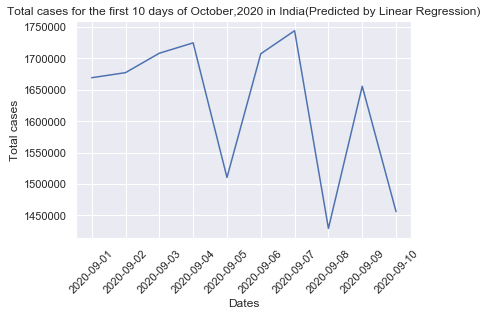

In [233]:
plt.plot(dateslist,y_pred)
plt.title('Total cases for the first 10 days of October,2020 in India(Predicted by Linear Regression)')
plt.xlabel('Dates')
plt.ylabel('Total cases')
plt.xticks(rotation=45)
plt.show()

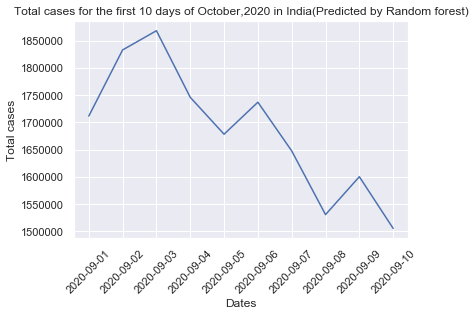

In [234]:
plt.plot(dateslist,y_pred_for)
plt.title('Total cases for the first 10 days of October,2020 in India(Predicted by Random forest)')
plt.xlabel('Dates')
plt.ylabel('Total cases')
plt.xticks(rotation=45)
plt.show()

### Thus, we predicted the total COVID-19 cases for the first 10 days of October,and the plot shows a significant decline over the 10 days.This certainly is an optimistic result and I hope it so happens!

# THANK YOU!